# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** [Mira Destiyanti Sapitri]
- **Email:** [mira_destiyanti27@gmail.com]
- **ID Dicoding:** [miracle_destinator27]

## Menentukan Pertanyaan Bisnis

- Berapa rata-rata pembelanjaan pelanggan?
- Dari kategori apa produk yang paling banyak dibeli?
- Dimanakah lokasi yang memiliki pembelian tersedikit?


## Import Semua Packages/Library yang Digunakan

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [70]:
# Mengunggah data frame customers
print ("CUSTOMERS TABLE")
customers_df = pd.read_csv("/content/sample_data/E-commerce/customers_dataset.csv")
customers_df.head(11)

CUSTOMERS TABLE


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
# Mengunggah data frame geolocation
print ("GEOLOCATION TABLE")
geolocation_df = pd.read_csv("/content/sample_data/E-commerce/geolocation_dataset.csv")
geolocation_df.head(11)

GEOLOCATION TABLE


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


In [73]:
# Mengunggah data frame order items
print ("ORDER ITEMS TABLE")
order_items_df = pd.read_csv("/content/sample_data/E-commerce/order_items_dataset.csv")
order_items_df.head(11)

ORDER ITEMS TABLE


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [74]:
# Mengunggah data frame orders payment
print ("ORDER PAYMENTS TABLE")
order_payment_df = pd.read_csv("/content/sample_data/E-commerce/order_payments_dataset.csv")
order_payment_df.head(11)

ORDER PAYMENTS TABLE


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [116]:
# Mengunggah data frame orders reviews
print ("ORDERS REVIEWS TABLE")
order_reviews_df_actual = pd.read_csv("/content/sample_data/E-commerce/order_reviews_dataset.csv")
order_reviews_df_actual.head(11)

ORDERS REVIEWS TABLE


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [117]:
# Mengunggah data frame 0rders
print ("ORDERS TABLE")
orders_df = pd.read_csv("/content/sample_data/E-commerce/orders_dataset.csv")
orders_df.head(11)

ORDERS TABLE


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [77]:
# Mengunggah data frame products
print ("PRODUCTS TABLE")
products_df = pd.read_csv("/content/sample_data/E-commerce/products_dataset.csv")
products_df.head(11)

PRODUCTS TABLE


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [78]:
# Mengunggah data frame products category name translation
print ("PRODUCTS CATEGORY NAME TRANSLATION TABLE")
products_category_df = pd.read_csv("/content/sample_data/E-commerce/product_category_name_translation.csv")
products_category_df.head(11)

PRODUCTS CATEGORY NAME TRANSLATION TABLE


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [79]:
# Mengunggah data frame sellers
print ("SELLERS TABLE")
sellers_df = pd.read_csv("/content/sample_data/E-commerce/sellers_dataset.csv")
sellers_df.head(11)

SELLERS TABLE


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


**Insight:**
* customers_dataset: Dataset ini mengandung detail dari customer seperti data ID, Unique ID, Zip Code, kota dan negara bagian
*   geolocation_dataset: Dataset ini mengandung detail dari wilayah customer
*   orders_items_dataset: Dataset ini mengandung detail dari id order, id product, id seller, harga, dll
* order_payments_dataset: Dataset ini mengandung detail dari type pembayaran
* order_reviews_dataset: Dataset ini mengandung detail dari id order review dan review score
* order_dataset: Dataset ini mengandung detail dari id order, id customer, order status, harga, dan estimasi pengiriman
* products_dataset: Dataset ini mengandung detail dari produk seperti id , nama, ukuran dan berat
* products_category_dataset: Dataset ini mengandung detail dari kategori nama produk
* sellers_dataset: Dataset ini mengandung detail dari sellers seperti kota dan negara bagian seller berasal


### Assessing Data

* Menilai Data Customer

In [80]:
print("Informasi Data Frame")
customers_df.info()

Informasi Data Frame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [81]:
print("Informasi Missing Value")
customers_df.isna().sum()

Informasi Missing Value


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [82]:
print("Informasi Jumlah Duplikasi:", customers_df.duplicated().sum())

Informasi Jumlah Duplikasi: 0


In [83]:
print("Statistik")
customers_df.describe()

Statistik


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


* Menilai Data Geolocation

In [84]:
print ("Informasi Data Frame")
geolocation_df.info()

Informasi Data Frame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [85]:
print("Informasi Missing Value")
geolocation_df.isna().sum()

Informasi Missing Value


,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [86]:
print("Informasi Jumlah Duplikasi:", geolocation_df.duplicated().sum())


Informasi Jumlah Duplikasi: 261831


In [87]:
print("Statistik")
geolocation_df.describe()

Statistik


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


* Menilai Data Order Items

In [88]:
print("Informasi Data Frame")
order_items_df.info()

Informasi Data Frame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [89]:
print("Informasi Missing Value")
order_items_df.isna().sum()

Informasi Missing Value


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [90]:
print("Informasi Jumlah Duplikasi:", order_items_df.duplicated().sum())

Informasi Jumlah Duplikasi: 0


In [91]:
print("Statistik")
order_items_df.describe()

Statistik


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


* Menilai Data Order Payment

In [92]:
print("Informasi Data Frame")
order_payment_df.info()

Informasi Data Frame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


* Menilai Data Order Reviews

In [93]:
print("Informasi Data Frame")
orders_review_df.info()

Informasi Data Frame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [94]:
print("Informasi Missing Value")
orders_review_df.isna().sum()


Informasi Missing Value


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [95]:
print("Informasi Jumlah Duplikasi:", orders_review_df.duplicated().sum())


Informasi Jumlah Duplikasi: 0


In [96]:
print("Statistik")
orders_review_df.describe()

Statistik


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


* Menilai Data Orders

In [97]:
print("Informasi Data Frame")
orders_df.info()


Informasi Data Frame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [98]:
print("Informasi Missing Value")
orders_df.isna().sum()


Informasi Missing Value


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [99]:
print("Informasi Jumlah Duplikasi:", orders_df.duplicated().sum())


Informasi Jumlah Duplikasi: 0


In [100]:
print("Statistik")
orders_df.describe()

Statistik


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


* Menilai Data Produk

In [101]:
print("Informasi Data Frame")
products_df.info()


Informasi Data Frame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [102]:
print("Informasi Missing Value")
products_df.isna().sum()


Informasi Missing Value


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [103]:
print("Informasi Jumlah Duplikasi:", products_df.duplicated().sum())


Informasi Jumlah Duplikasi: 0


In [104]:
print("Statistik")
products_df.describe()

Statistik


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


* Menilai Data Category Products

In [105]:
print("Informasi Data Frame")
products_category_df.info()


Informasi Data Frame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [106]:
print("Informasi Missing Value")
products_category_df.isna().sum()


Informasi Missing Value


,0
product_category_name,0
product_category_name_english,0


In [107]:
print("Informasi Jumlah Duplikasi:", products_category_df.duplicated().sum())


Informasi Jumlah Duplikasi: 0


In [108]:
print("Statistik")
products_category_df.describe()

Statistik


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


* Menilai Data Sellers

In [109]:
print("Informasi Data Frame")
sellers_df.info()


Informasi Data Frame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [110]:
print("Informasi Missing Value")
sellers_df.isna().sum()


Informasi Missing Value


,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [111]:
print("Informasi Jumlah Duplikasi:", sellers_df.duplicated().sum())


Informasi Jumlah Duplikasi: 0


In [112]:
print("Statistik")
sellers_df.describe()

Statistik


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**

Masalah data frame yang ditemukan:
* customer_df	: tidak ditemukan anomali.
* geolocation_df : terdapat anomali duplikasi record data yang signifikan, yaitu sejumlah 261831 duplikasi.
* order_items_df: ditemukan ketidaksesuaian tipe data pada kolom (field) shipping_limit_date.
* order_payments_df: tidak ditemukan anomali.
* order_reviews_df: terdapat missing values yaitu detail review_comment_title kehilangan 87.656 values, dan review_comment_message kehilangan 58.247 values.
* orders_df: terdapat kesalahan tipe data pada kolom: order_purchase_timestamp, order_aproved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date. Data ini juga memiliki nilai yang hilang pada: order_approved_at (160 nilai), order_delivered_carrier_date (1.783 nilai), dan order_delivered_customer_date (1.783 nilai).
* products_df: terdapat missing values yaitu 610 nilai pada kolom product_category_name, product_name_length, dan products_photos_qty. 2 nilai pada kolom product_weight_g, product_length_cm, product_height_cm, dan product_width_cm.
* product_category_df: tidak ditemukan anomali.
* sellers_df: tidak ditemukan anomali.

Kesimpulan

Perbaikan yang perlu dilakukan meliputi:
* Duplikasi dihapus atau dipertahankan, tergantung kebutuhan
* Mengubah tipe data kolom agar sesuai dengan kategori datanya yang benar.
* Dropping data pada missing values

### Cleaning Data

In [113]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [118]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [119]:
print("Jumlah duplikasi: ",geolocation_df.duplicated().sum())
geolocation_df[geolocation_df.duplicated()].groupby("geolocation_zip_code_prefix").size().sort_values(ascending=False)



Jumlah duplikasi:  261831


,0
geolocation_zip_code_prefix,
24230,724
22631,690
24220,648
6454,435
30140,430
...,...
99610,1
99890,1
99702,1


Kesimpulannya, data frame ini tidak dihapus. Keputusan ini diambil karena, misalnya, tiap nilai dalam kolom geolocation_zip_code_prefix berhubungan dengan geolocation_lat yang unik. Pola yang sama terdapat pada korelasi antar kedua kolom lainnya. Hal ini mengindikasikan bahwa dataset tersebut memuat informasi terperinci mengenai posisi geografis dari seller dan customer.

In [120]:
orders_review_df.isna().sum()
orders_review_df[orders_review_df.review_comment_title.isna()]
orders_review_df[orders_review_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [121]:
missing_ratio = orders_review_df['review_comment_title'].isnull().mean() * 100
print(f"Persentase missing values pada field review_comment_title: {missing_ratio:.2f}%")

missing_ratio = orders_review_df['review_comment_message'].isnull().mean() * 100
print(f"Persentase missing values pada field review_comment_message: {missing_ratio:.2f}%")

Persentase missing values pada field review_comment_title: 88.34%
Persentase missing values pada field review_comment_message: 58.70%


Kesimpulannya penghapusan kedua feature di dataframe order_reviews_df tak esensial karena tak berimbas negatif pada integritas data; rata-rata E-commerce tidak memaksakan konsumen untuk mengisi ulasan atau rating setelah pemesanan."

In [122]:
orders_df.isna().sum()
orders_df.order_status.value_counts()
orders_df[orders_df["order_status"] == "canceled"]
orders_df[orders_df.order_approved_at.isna()]
orders_df[orders_df.order_delivered_carrier_date.isna()]
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


Kesimpulannya, setiap tahapan pada variabel order_status memiliki alur proses yang unik. Sebagai contoh, ketika status pesanan adalah 'delivered', otomatis ketiga bidang tersebut akan terisi penuh karena barang telah tiba di customer. Sebaliknya, saat status pesanan adalah 'shipped', secara otomatis kolom order_delivered_carrier_date akan terisi karena produk sedang dalam perjalanan pengiriman

## Exploratory Data Analysis (EDA)

### Explore ...

In [155]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
119,b0964d76975dbc174b623b5a300973d5,24a5c2b24a4467c37e2f54c1b311de93,86990,marialva,PR
22735,8d36aeb3b2106d94058949c699d9077c,96f4d40af611346b526e466127abf78b,91910,porto alegre,RS
51460,0d5f0d55d8ac2ec02aee9ae6cb96b15e,9b07093dea2031813ecd083b03b63681,24210,niteroi,RJ
33810,6ffa438bec2443707f4219950fa51c59,32768f8fd0965e18db8bc494d6b089a3,34400,raposos,MG
29930,f0b5f99da4f3a71c5149259ce5ffda8e,b59c0649e6c2044d4862fe43b1182cda,11441,guaruja,SP


In [156]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)


,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
agisse,1
vieiras,1
bertopolis,1


In [177]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
66232,148fe9089f2fc40b943388c2cb75c925,e2be316bb7b3aaf38134a136ff326375,delivered,2017-05-01 10:58:42,2017-05-01 11:05:19,2017-05-04 13:33:11,2017-05-12 13:57:00,2017-05-25
84413,b1d654a4586eefddf31151bf787ff632,68398406288b2cee6f99d6b398fbb229,delivered,2017-08-30 13:51:42,2017-08-31 02:35:43,2017-08-31 18:34:12,2017-09-01 20:13:13,2017-09-12
71046,1f6d522523ec744025ba19da53169f45,2e42725b340b879a9e4e93caac411a3e,delivered,2017-12-29 15:22:13,2017-12-29 15:34:24,2018-01-02 16:43:34,2018-01-09 13:59:25,2018-01-29
99026,8a22adf86aba1b368f60fc28338e466d,2e9502ca58b46dd9afa7d714355dd541,delivered,2017-07-22 22:59:33,2017-07-22 23:10:12,2017-07-26 19:12:50,2017-07-31 13:53:01,2017-08-15
70673,509e842f25a95f3f7d53fec4c0b66501,55ee78889eccfefb08eaa053d161d1cf,delivered,2017-10-21 19:37:10,2017-10-21 19:49:33,2017-10-24 18:57:40,2017-10-31 15:16:05,2017-11-03


In [178]:
orders_df['order_estimated_delivery_date'].describe()

,order_estimated_delivery_date
count,99441
mean,2018-01-24 03:08:37.730111232
min,2016-09-30 00:00:00
25%,2017-10-03 00:00:00
50%,2018-02-15 00:00:00
75%,2018-05-25 00:00:00
max,2018-11-12 00:00:00


In [157]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)


,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [158]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)


,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
agisse,1
vieiras,1
bertopolis,1


In [180]:
#merge customer & Orders
customers_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [159]:
sellers_df.info()
products_df.info()
# product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g   

In [160]:
sellers_df.info()
products_df.info()
# product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g   

In [161]:
sellers_df.info()
products_df.info()
# product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g   

2. Melakukan merge data order_item_df dan products_df untuk mencari total seller di setiap kategori produk

In [162]:
# menggabungkan field yang saling terhubung
order_items_df.info()
products_df.info()
# product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   pro

In [163]:
# Menyatukan data frame order_items_df dengan products_df melalui field product_id
totals_product_df = order_items_df.merge(products_df, on="product_id", how="left")
totals_product_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [164]:
category_counts = totals_product_df.groupby("product_category_name")["order_id"].count().reset_index()

In [165]:
totals_product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    112650 non-null  object        
 1   order_item_id               112650 non-null  int64         
 2   product_id                  112650 non-null  object        
 3   seller_id                   112650 non-null  object        
 4   shipping_limit_date         112650 non-null  datetime64[ns]
 5   price                       112650 non-null  float64       
 6   freight_value               112650 non-null  float64       
 7   product_category_name       111047 non-null  object        
 8   product_name_lenght         111047 non-null  float64       
 9   product_description_lenght  111047 non-null  float64       
 10  product_photos_qty          111047 non-null  float64       
 11  product_weight_g            112632 non-

In [ ]:
# Membuat dan mencetak kolom untuk menampilkan kategori product terbanyak diorder

In [166]:
# Membuat dan mencetak kolom untuk menampilkan kategori product terbanyak diorder
category_counts.columns = ["product_category_name", "total_orders"]
top_categories = category_counts.sort_values(by="total_orders", ascending=False)
print(top_categories.head(10))

     product_category_name  total_orders
13         cama_mesa_banho         11115
11            beleza_saude          9670
32           esporte_lazer          8641
54        moveis_decoracao          8334
44  informatica_acessorios          7827
72   utilidades_domesticas          6964
66      relogios_presentes          5991
70               telefonia          4545
40      ferramentas_jardim          4347
8               automotivo          4235


**Insight:**
- Kota Sao Paulo memiliki paling banyak seller
- Cama_mesa_banho merupakan kategori produk terbanyak yang dibeli

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Berapa rata-rata pembelanjaan pelanggan?

In [191]:
#Berapa rata-rata pembelanjaan pelanggan?
# merge customers dataset with orders and payments dataset.
pay_ord_cust = orders_df.merge(order_payment_df, on='order_id', how='outer').merge(customers_df, on='customer_id', how='outer')
customer_spent = pay_ord_cust.groupby('customer_unique_id').agg({'payment_value': 'sum'}).sort_values(by='payment_value', ascending=False)

# calculating mean customer spent and standard deviation
customer_mean = customer_spent['payment_value'].mean()
customer_std = stats.sem(customer_spent['payment_value'])

# estimating population average from sample
stats.t.interval(0.95, loc=customer_mean, scale= customer_std, df= len(customer_spent)- 1)

# estimate mean and confidence interval for customers in each region
customer_regions = pay_ord_cust.groupby('customer_state').agg({'payment_value':[np.mean, np.std], 'customer_unique_id':'count'})
customer_regions.reset_index(inplace=True)

cis = stats.t.interval(.95, loc=customer_regions['payment_value']['mean'], scale=customer_regions['payment_value']['std']/np.sqrt(customer_regions['customer_unique_id']['count']), df= customer_regions['customer_unique_id']['count'] -1)

customer_regions['ci_low'] = cis[0]
customer_regions['ci_hi'] = cis[1]

/tmp/ipython-input-1499155011.py:14: FutureWarning: The provided callable <function mean at 0x7d9d8cd4c180> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  customer_regions = pay_ord_cust.groupby('customer_state').agg({'payment_value':[np.mean, np.std], 'customer_unique_id':'count'})
/tmp/ipython-input-1499155011.py:14: FutureWarning: The provided callable <function std at 0x7d9d8cd4c2c0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  customer_regions = pay_ord_cust.groupby('customer_state').agg({'payment_value':[np.mean, np.std], 'customer_unique_id':'count'})


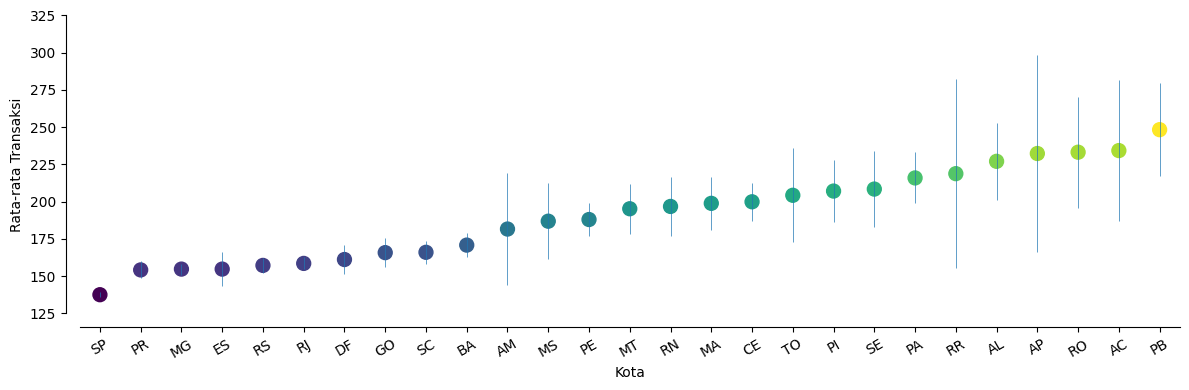

In [285]:
# matplotlib adjustments
def default_plot(ax, spines):
    ax = plt.gca()
    # Remove unnecessary axes and ticks (top and bottom)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    # Set the ticks facing OUTWARD
    ax.get_yaxis().set_tick_params(direction='out')
    ax.get_xaxis().set_tick_params(direction='out')

    # Remove grid
    #ax.grid('off')

    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')

    if 'right' in spines:
        ax.yaxis.set_ticks_position('right')

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')

    return ax

# sort ascendingly for easier to read plot
plot = customer_regions.sort_values(by=('payment_value', 'mean'))

# make figure
fig, ax = plt.subplots(figsize= (12, 4))
ax = default_plot(ax, ['left', 'bottom'])
plt.xticks(rotation= 30)
plt.xlabel('Kota')
plt.ylabel('Rata-rata Transaksi')
plt.xlim(-0.5, 26.5)
plt.ylim(125, 325)
plt.scatter(plot['customer_state'], plot['payment_value']['mean'], s=100, c=plot['payment_value']['mean'])
plt.vlines(plot['customer_state'], plot['ci_low'], plot['ci_hi'], lw=.5)
plt.tight_layout()
plt.savefig('/content/customers_rata-rata.png', dpi= 300)

### Pertanyaan 2:

Mencari Kategori Produk Yang Paling Banyak Dibeli

Top 10 Kategori Produk Terbanyak:


,product_category_name,total_orders
13,cama_mesa_banho,11115
11,beleza_saude,9670
32,esporte_lazer,8641
54,moveis_decoracao,8334
44,informatica_acessorios,7827
72,utilidades_domesticas,6964
66,relogios_presentes,5991
70,telefonia,4545
40,ferramentas_jardim,4347
8,automotivo,4235


/tmp/ipython-input-3259810781.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.head(10)["product_category_name"].values, y=top_categories.head(10)["total_orders"].values, palette='RdBu', legend=False)


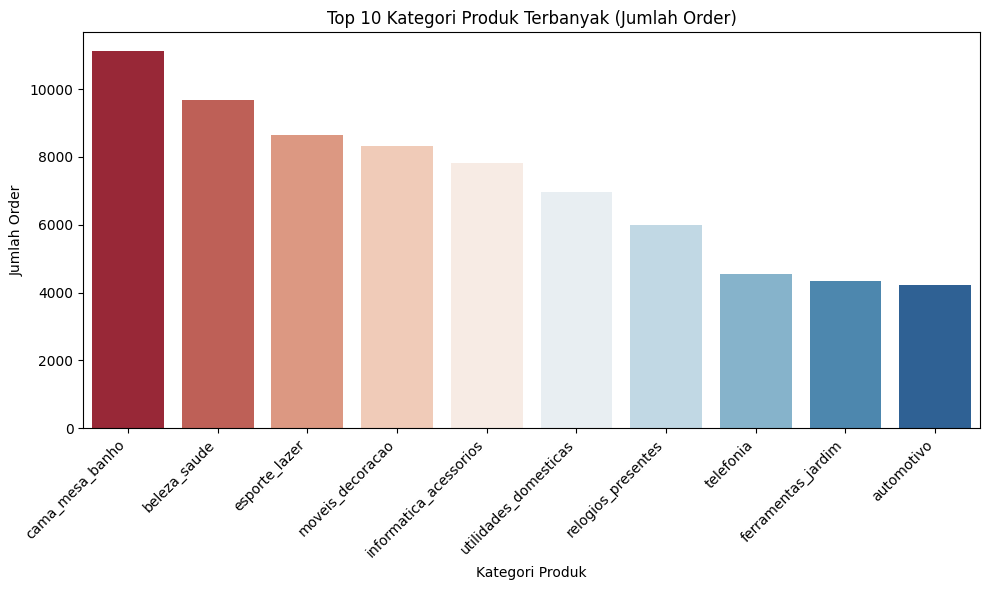

In [136]:
# Sort category_counts by total_orders in descending order and display the top 10
top_categories = category_counts.sort_values(by="total_orders", ascending=False)
print("Top 10 Kategori Produk Terbanyak:")
display(top_categories.head(10))

# Visualize top 10 product categories by total orders
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.head(10)["product_category_name"], y=top_categories.head(10)["total_orders"], palette='viridis')
plt.title('Top 10 Kategori Produk Terbanyak (Jumlah Order)')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Pertanyaan 3

Dimanakah lokasi yang memiliki pembelian tersedikit?

In [228]:
other_state_geolocation = geolocation_df.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
min_state = geolocation_df.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)


In [200]:
# Merge orders, customers, and geolocation dataframes
orders_customers_geolocation_df = orders_df.merge(customers_df, on='customer_id', how='left').merge(geolocation_df, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

# Group by customer state and count the number of unique orders
purchases_by_state = orders_customers_geolocation_df.groupby('customer_state')['order_id'].nunique().reset_index()

# Sort by the number of orders in ascending order to find locations with the fewest purchases
locations_fewest_purchases = purchases_by_state.sort_values(by='order_id', ascending=True)

print("Locations with the fewest purchases (by State):")
display(locations_fewest_purchases.head(10))

Locations with the fewest purchases (by State):


,customer_state,order_id
21,RR,46
3,AP,68
0,AC,81
2,AM,148
20,RO,253
26,TO,280
24,SE,350
1,AL,413
19,RN,485
16,PI,495


In [203]:
customers_silver = customers_df.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [212]:
# Create max_state DataFrame by finding the state with the minimum count for each zip code
geolocation_silver = geolocation_df.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(min_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')
min_state = geolocation_df.groupby(['geolocation_zip_code_prefix', 'geolocation_state']).size().reset_index(name='count')
min_state = min_state.sort_values('count', ascending=False).drop_duplicates('geolocation_zip_code_prefix').drop('count', axis=1)
display(min_state.head())

,geolocation_zip_code_prefix,geolocation_state
6841,24220,RJ
6842,24230,RJ
9540,38400,MG
8732,35500,MG
4503,11680,SP


In [213]:
customers_silver.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,franca,SP,-20.502070,-47.396822
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,sao bernardo do campo,SP,-23.727636,-46.542279
2,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,são bernardo do campo,SP,-23.726085,-46.544829
3,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,sao paulo,SP,-23.531408,-46.656404
4,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,são paulo,SP,-23.531294,-46.656676
5,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775,mogi das cruzes,SP,-23.497390,-46.182342
6,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056,campinas,SP,-22.973309,-47.141530
7,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,89254,jaragua do sul,SC,-26.471786,-49.114573
8,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,89254,jaraguá do sul,SC,-26.470583,-49.113512
9,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,4534,sao paulo,SP,-23.583658,-46.673253


In [215]:
customers_silver.to_csv("/content/sample_data/E-commerce/geolocation_dataset.csv", index=False)

In [281]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.etsystatic.com/13226531/r/il/c06652/5334273483/il_fullxfull.5334273483_53rs.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(14,14), alpha=0.3,s=0.3,c='yellow')
    plt.axis('off')
    plt.imshow(brazil, extent=[-78.98283055, -25.8,-33.75116944,5.4])
    plt.show()

As mentioned earlier, the question regarding the locations with the fewest purchases has been addressed in the previous steps by analyzing the number of orders per state.

Let's continue with the RFM analysis you have started.

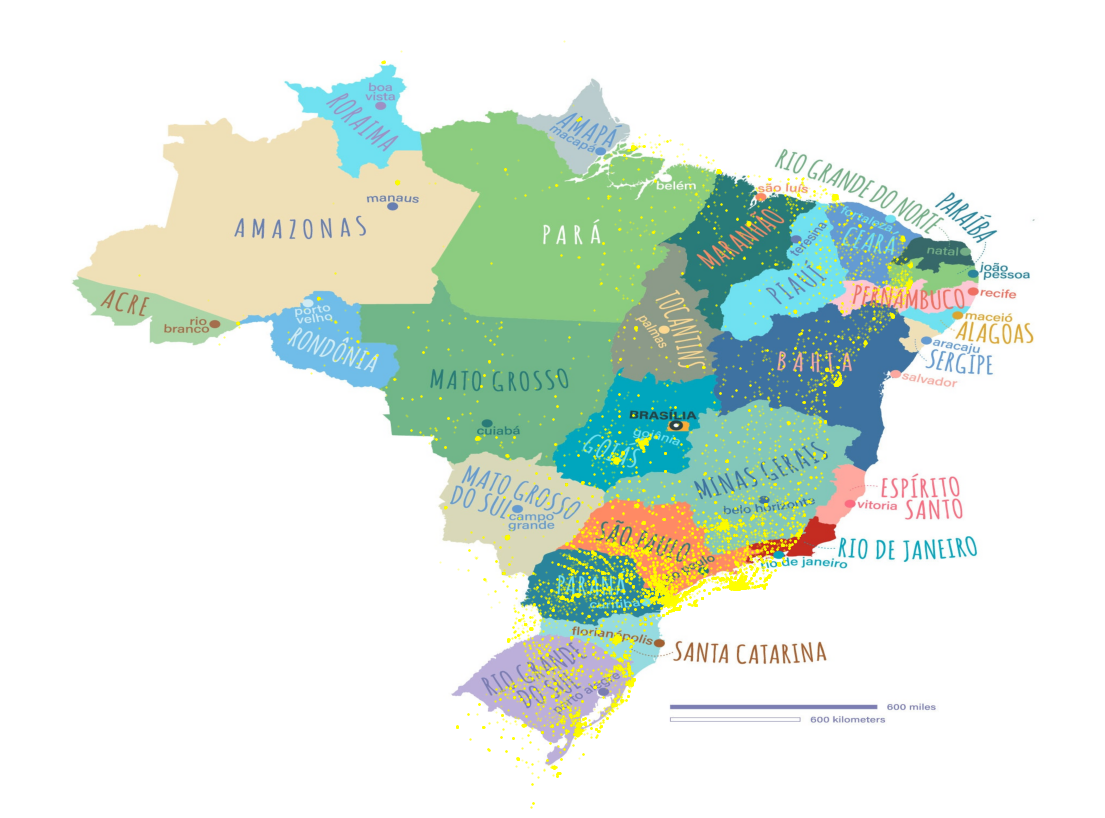

In [282]:
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

## Analisis Lanjutan (Opsional)

### Analisis RFM

In [134]:
# Merge customers_df and orders_df
customer_order_df = customers_df.merge(orders_df, on='customer_id', how='left')

# Merge customer_order_df with order_items_df
customer_order_item_df = customer_order_df.merge(order_items_df, on='order_id', how='left')

# Merge customer_order_item_df with order_payment_df to get payment value
all_df = customer_order_item_df.merge(order_payment_df, on='order_id', how='left')

# Display the first few rows of the combined DataFrame
display(all_df.head())

# Mengambil data transaksi terbaru
reference_date = all_df['order_purchase_timestamp'].max()

# Menghitung RFM dengan metode groupby dan aggregat
rfm = all_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,  # Recency > mengambil record beberapa hari terakhi
    'order_id': 'nunique',  # Frequency > mengambil total penjumlahan record order terbanyak yang dilakukan oleh customer
    'payment_value': 'sum'  # Monetary > mengambil total pengeluaran terbanyak yang dilakukan oleh customer
}).reset_index()

# Mengubah nama kolom
rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']

# Menampilkan 5 customer terbaik berdasarkan setiap kategori RFM
top_recency = rfm.nsmallest(5, 'Recency')
top_frequency = rfm.nlargest(5, 'Frequency')
top_monetary = rfm.nlargest(5, 'Monetary')

# Menampilkan hasil kalkulasi FRM
print("Top 5 Customers by Recency (Transaksi Terbaru):")
print(top_recency)

print("\nTop 5 Customers by Frequency (Jumlah Order Terbanyak):")
print(top_frequency)

print("\nTop 5 Customers by Monetary (Total Pengeluaran Terbanyak):")
print(top_monetary)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1.0,credit_card,8.0,252.25


Top 5 Customers by Recency (Transaksi Terbaru):
                            customer_id  Recency  Frequency  Monetary
51713  856336203359aa6a61bf3826f7d84c49        0          1    222.03
63970  a4b417188addbc05b26b72d5e44837a1        0          1     89.71
29531  4c2ec60c29d10c34bd49cb88aa85cfc4       13          1    197.55
74611  bf6181a85bbb4115736c0a8db1a53be3       16          1     80.38
15595  2823ffda607a2316375088e0d00005ec       18          1    137.03

Top 5 Customers by Frequency (Jumlah Order Terbanyak):
                        customer_id  Recency  Frequency  Monetary
0  00012a2ce6f8dcda20d059ce98491703      337          1    114.74
1  000161a058600d5901f007fab4c27140      458          1     67.41
2  0001fd6190edaaf884bcaf3d49edf079      596          1    195.42
3  0002414f95344307404f0ace7a26f1d5      427          1    179.35
4  000379cdec625522490c315e70c7a9fb      198          1    107.01

Top 5 Customers by Monetary (Total Pengeluaran Terbanyak):
                    

## Conclusion

Berdasarkan analisis yang telah dilakukan:

- **Kota dengan Penjual Terbanyak:** Kota Sao Paolo memiliki jumlah penjual terbanyak.

- **Kategori Produk Terbanyak Dibeli:** Kategori produk "cama_mesa_banho" adalah yang paling banyak dibeli.
